<a href="https://colab.research.google.com/github/vaneesa-writes/Water-Quality-Flutter/blob/main/can_i_drink_this_80_acc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Water Quality Predictor** 🚱🚰

<img src="https://media.giphy.com/media/9gD2UALjYkzQkXDAE2/giphy.gif">

A woman drinks water from a river in India. Photo courtesy of The Guardian.

# 1 - Introduction

## 1.1 - Dataset Description

### Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

## 1.2 - Dataset Dictionary

## 1.2.1 - X features

### 🧪 ***pH value:***
### PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.
### 🧂 ***Hardness:*** 
### Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.
### 💎 ***Solids (Total dissolved solids - TDS):***
### Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.
### 💊 ***Chloramines:***
### Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.
### ⛰ ***Sulfate:***
### Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.
### 🔌 ***Conductivity:***
### Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.
### 🍁 ***Organic_carbon:***
### Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.
### ⚗ ***Trihalomethanes:***
### THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.
### 🩸 ***Turbidity:***
### The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

## 1.2.2 - Y feature

### 🚱🚰 ***Potability:***
### Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

## 1.2.3 - Problem definition

### Thirst is no joke. My aim for this project is to achieve a model that has 90% accuracy when it comes to predicting if determined water is potable or not. 

# 2 - Development

## 2.1 - Exploratory Data Analysis (EDA)

Importing the libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!kaggle datasets download -d adityakadiwal/water-potability

  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 57.4MB/s]


Importing the dataset

In [4]:
water = pd.read_csv("/content/water-potability.zip")

Basic dataframe checks

In [5]:
water.shape

(3276, 10)

In [6]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Checking for null values in the dataframe

In [7]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Filling the null values

In [8]:
water['ph']=water['ph'].fillna(water.groupby(['Potability'])['ph'].transform('mean'))
water['Sulfate']=water['Sulfate'].fillna(water.groupby(['Potability'])['Sulfate'].transform('mean'))
water['Trihalomethanes']=water['Trihalomethanes'].fillna(water.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

Finding any values that contains "ph" equal or smaller than zero.

In [9]:
water[water["ph"] <= 0]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3014,0.0,214.846144,49456.587108,7.897539,334.56429,583.448849,7.702328,77.712891,4.92884,0


Dropping the value that has "ph" equal to zero

In [10]:
water.drop(3014, inplace=True)

Checking data destribution and density in the dataframe

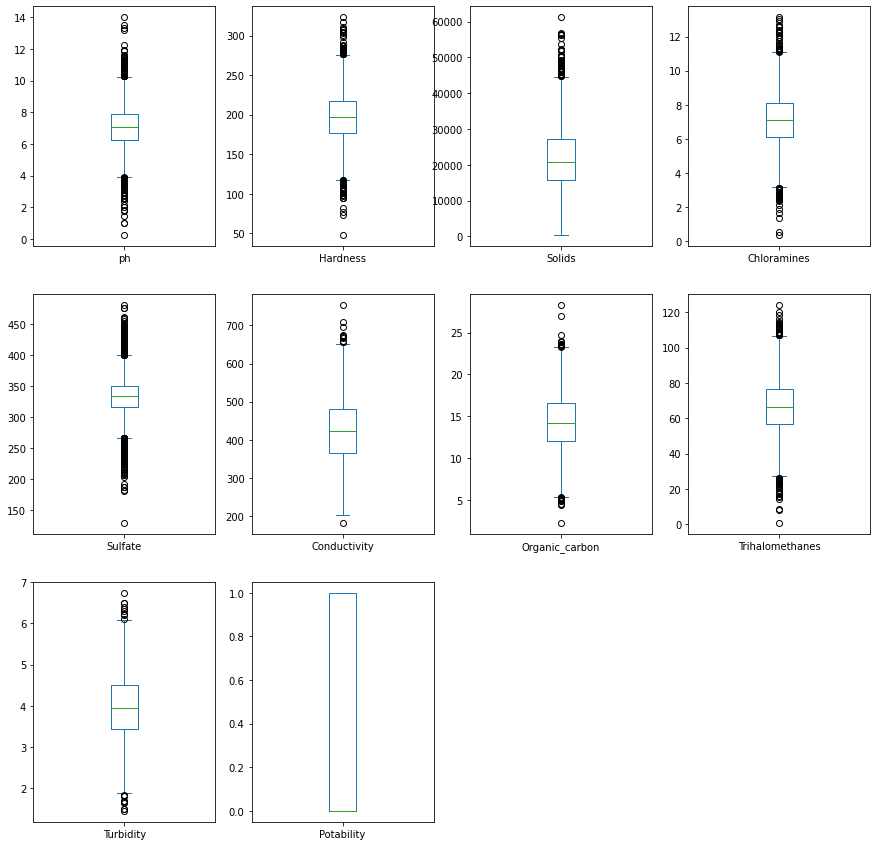

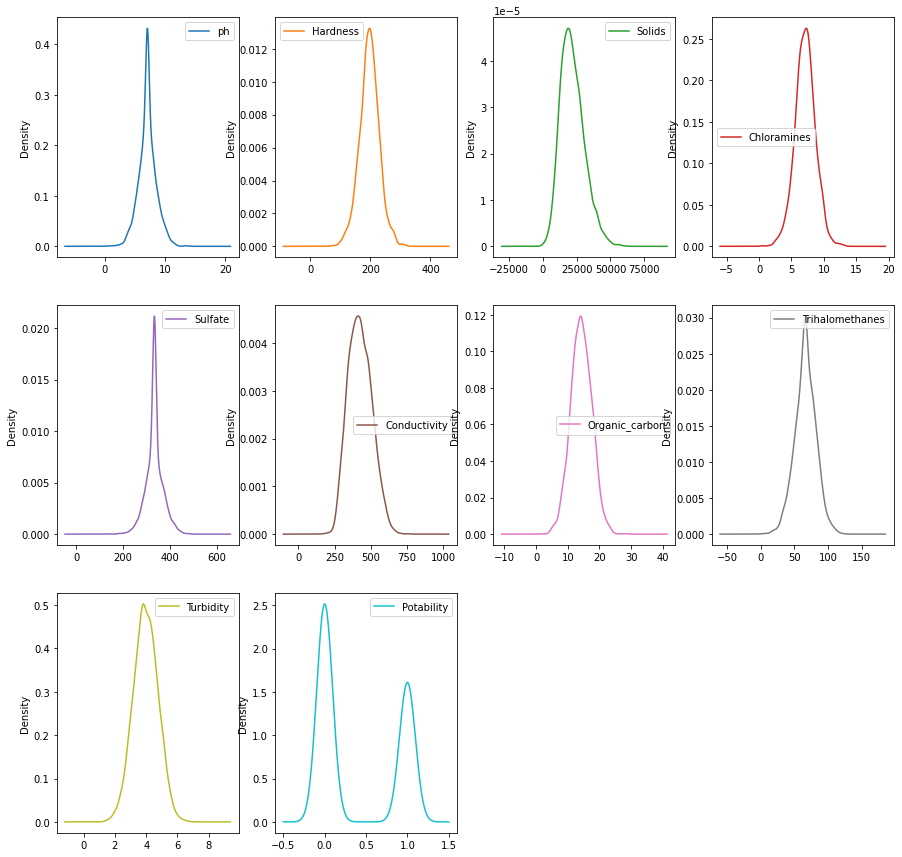

In [11]:
water.plot(kind = "box",
                layout = (3,4),
                subplots = True,
                figsize = (15,15))

water.plot(kind = "density",
                layout = (3,4),
                subplots = True,
                figsize = (15,15),
                sharex = False)

plt.show()

It appears that there are many outliers and non normal distribuions in the dataframe. The next step will use Box Cox Transformation in order to minimize this.

Using the Box Cox transformation in the data. Before = Blue ; After = Red.

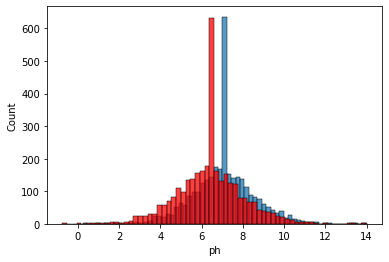

In [12]:
sns.histplot(water["ph"])

water["ph"], fitted_lambda= scipy.stats.boxcox(water["ph"])

sns.histplot(water["ph"], color="Red");

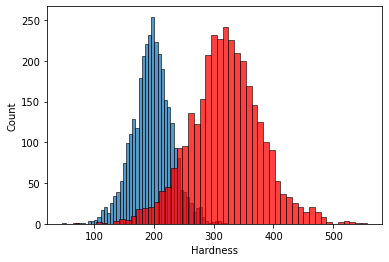

In [13]:
sns.histplot(water["Hardness"])

water["Hardness"], fitted_lambda= scipy.stats.boxcox(water["Hardness"])

sns.histplot(water["Hardness"], color="Red");

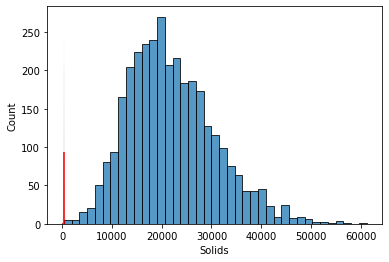

In [14]:
sns.histplot(water["Solids"])

water["Solids"], fitted_lambda= scipy.stats.boxcox(water["Solids"])

sns.histplot(water["Solids"], color="Red");

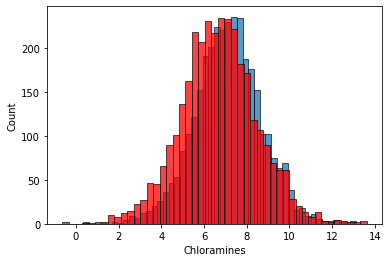

In [15]:
sns.histplot(water["Chloramines"])

water["Chloramines"], fitted_lambda= scipy.stats.boxcox(water["Chloramines"])

sns.histplot(water["Chloramines"], color="Red");

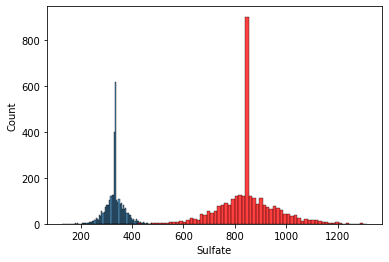

In [16]:
sns.histplot(water["Sulfate"])

water["Sulfate"], fitted_lambda= scipy.stats.boxcox(water["Sulfate"])

sns.histplot(water["Sulfate"], color="Red");

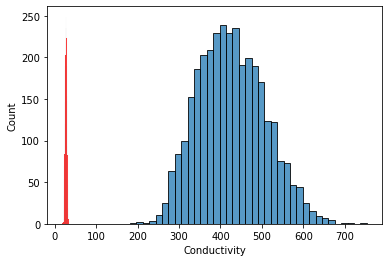

In [17]:
sns.histplot(water["Conductivity"])

water["Conductivity"], fitted_lambda= scipy.stats.boxcox(water["Conductivity"])

sns.histplot(water["Conductivity"], color="Red");

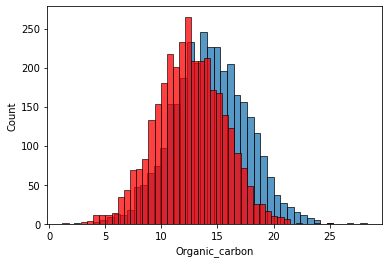

In [18]:
sns.histplot(water["Organic_carbon"])

water["Organic_carbon"], fitted_lambda= scipy.stats.boxcox(water["Organic_carbon"])

sns.histplot(water["Organic_carbon"], color="Red");

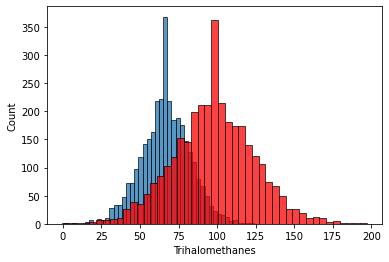

In [19]:
sns.histplot(water["Trihalomethanes"])

water["Trihalomethanes"], fitted_lambda= scipy.stats.boxcox(water["Trihalomethanes"])

sns.histplot(water["Trihalomethanes"], color="Red");

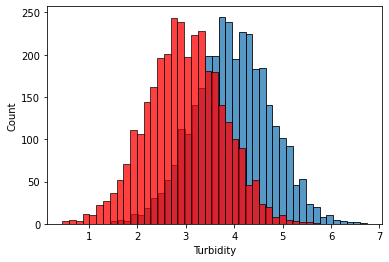

In [20]:
sns.histplot(water["Turbidity"])

water["Turbidity"], fitted_lambda= scipy.stats.boxcox(water["Turbidity"])

sns.histplot(water["Turbidity"], color="Red");

Correlation study about the data

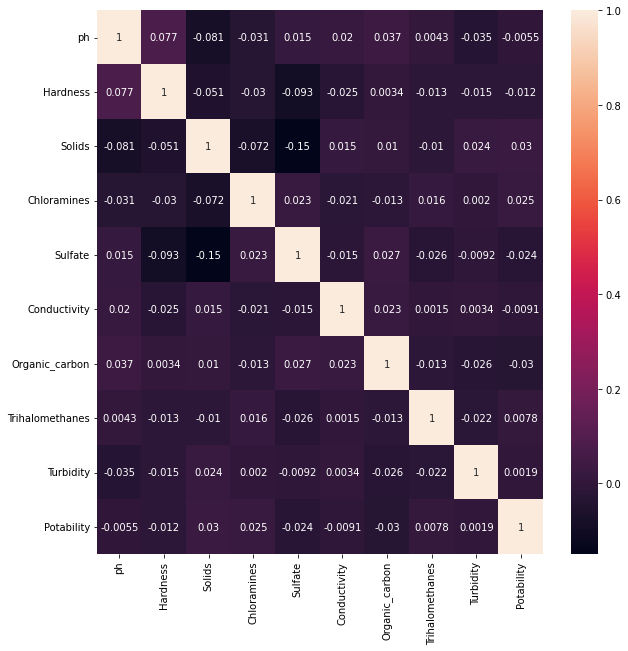

In [21]:
matrix_cor = water.corr()
ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_cor, annot=True)

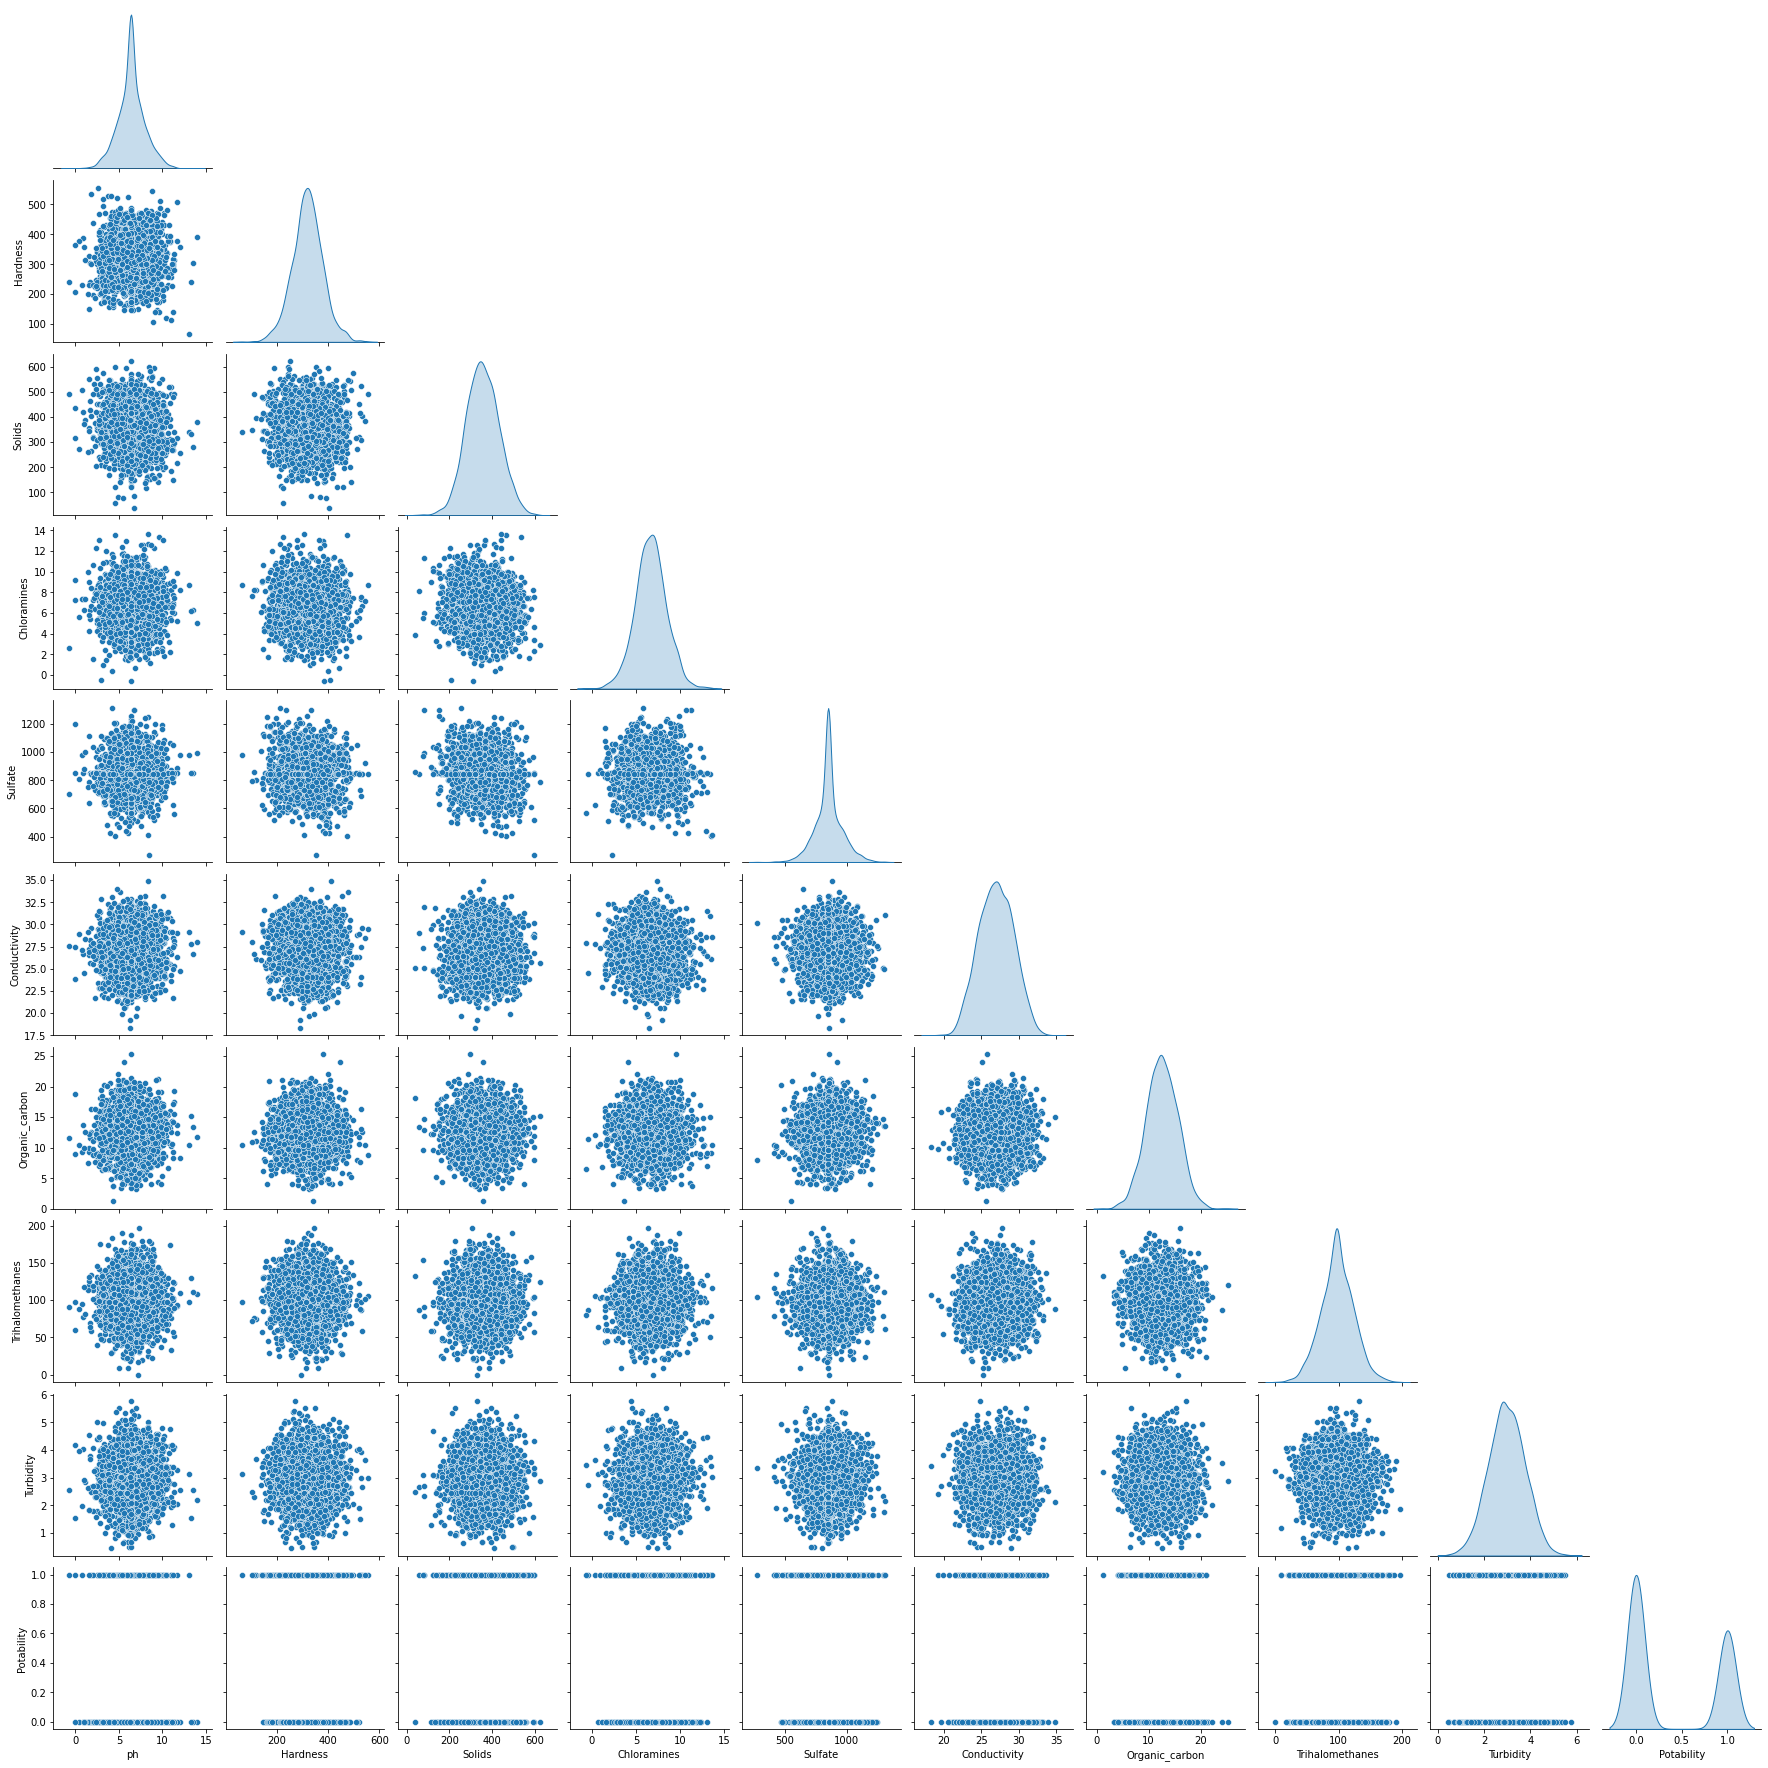

In [22]:
sns.pairplot(water, diag_kind = "kde", corner = True);

## 2.2 - Model Building

Creating the X and y dataframes that will be fitted in the models

In [70]:
water_X = water.drop("Potability", axis=1)
water_y = water["Potability"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(water_X, water_y, test_size=0.2)

In [72]:
X_train.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

Creating the Logistic Regression model

In [25]:
logreg = LogisticRegression()

In [26]:
logreg.fit(X_train, y_train)

LogisticRegression()

Logistic Regresison model scoring

In [27]:
logreg.score(X_test, y_test)

0.6030534351145038

In [28]:
logreg_preds = logreg.predict(X_test)

In [29]:
print(classification_report(y_test, logreg_preds))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       394
           1       0.67      0.01      0.02       261

    accuracy                           0.60       655
   macro avg       0.63      0.50      0.38       655
weighted avg       0.63      0.60      0.46       655



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


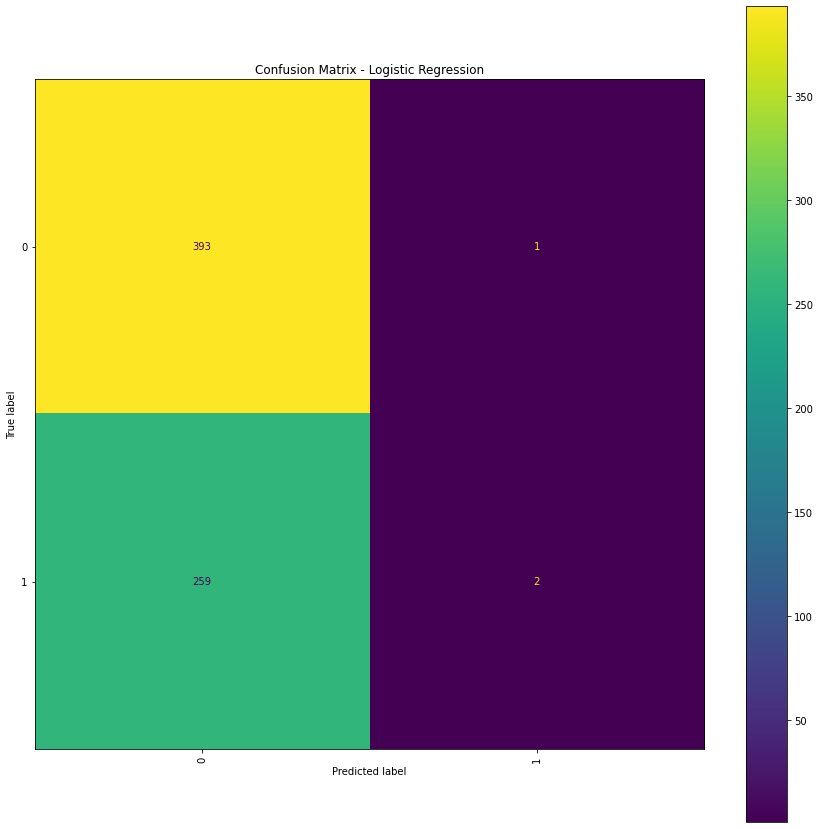

In [30]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.title("Confusion Matrix - Logistic Regression")
metrics.plot_confusion_matrix(logreg, X_test, y_test, xticks_rotation="vertical", ax=ax)

In [31]:
y_score_logreg = logreg.predict_proba(X_test)[:,1]

In [32]:
false_positive_rate_logreg, true_positive_rate_logreg, threshold_logreg = roc_curve(y_test, y_score_logreg)

In [33]:
 print("roc_auc_score for Logistic Regression: ", roc_auc_score(y_test, y_score_logreg))

roc_auc_score for Logistic Regression:  0.49639224381041286


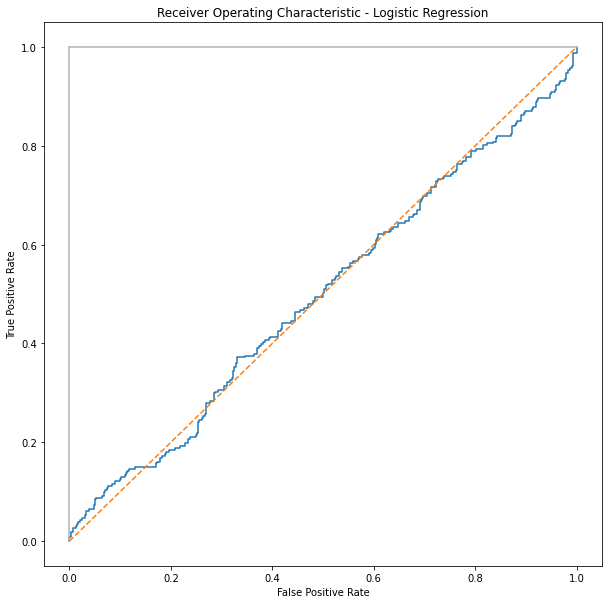

In [34]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate_logreg, true_positive_rate_logreg)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Creating the Decision Tree Classifier model

In [35]:
dectree = DecisionTreeClassifier(random_state=42)

In [36]:
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Decision Tree Classifier model scoring

In [37]:
dectree.score(X_test, y_test)

0.7343511450381679

In [38]:
logreg_dectree = dectree.predict(X_test)

In [39]:
print(classification_report(y_test, logreg_dectree))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       394
           1       0.66      0.68      0.67       261

    accuracy                           0.73       655
   macro avg       0.72      0.73      0.72       655
weighted avg       0.74      0.73      0.73       655



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


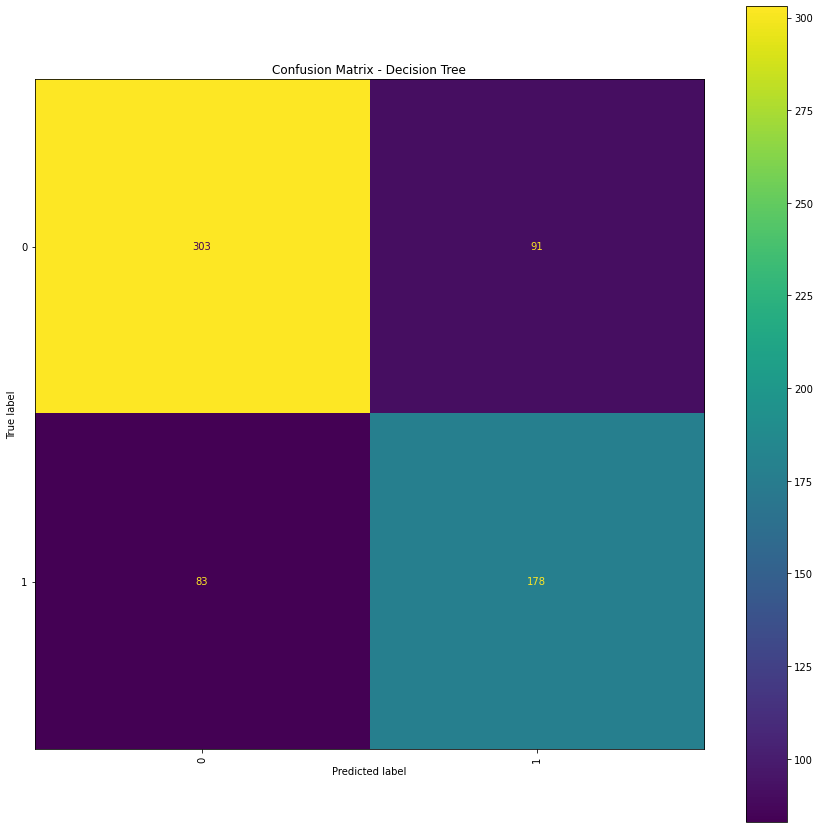

In [40]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.title("Confusion Matrix - Decision Tree")
metrics.plot_confusion_matrix(dectree, X_test, y_test, xticks_rotation="vertical", ax=ax)

In [41]:
y_score_dectree = dectree.predict_proba(X_test)[:,1]

In [42]:
false_positive_rate_dectree, true_positive_rate_dectree, threshold_dectree = roc_curve(y_test, y_score_dectree)

In [43]:
 print("roc_auc_score for DecisionTree: ", roc_auc_score(y_test, y_score_dectree))

roc_auc_score for DecisionTree:  0.7255139350798374


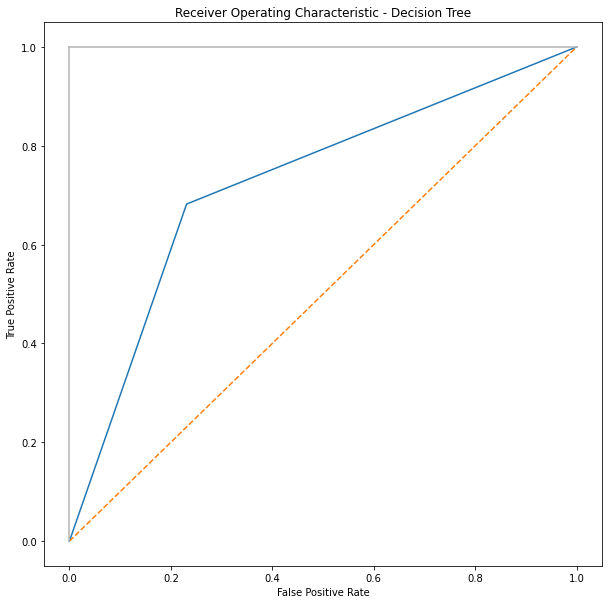

In [44]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(false_positive_rate_dectree, true_positive_rate_dectree)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Creating the Random Forest Classifier model

In [45]:
random = RandomForestClassifier(max_depth=14,
                                n_estimators=600,
                                n_jobs=-1)

In [64]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
332,4.567316,399.008553,328.430022,4.886734,1046.341314,30.381221,11.179836,119.819557,3.182598
1223,6.931814,298.515735,372.428254,5.267636,740.285757,29.545359,10.459230,120.723010,3.173253
1434,6.650399,318.489609,341.055887,6.133440,741.281543,26.837703,15.167545,102.476607,1.985886
993,7.760546,382.701306,280.866282,7.226287,788.490073,29.781825,16.538902,83.642243,3.227342
3054,8.540971,262.077063,347.699459,7.185892,761.283652,26.570936,8.735344,128.231380,3.309376
...,...,...,...,...,...,...,...,...,...
2726,6.464266,396.747601,293.522438,8.351930,1215.272809,25.266148,13.156492,75.675801,1.636936
249,6.038705,382.806584,331.731437,8.524837,875.773897,25.862468,12.165877,119.010301,4.177061
2033,7.979594,393.161010,324.965602,3.997647,871.168660,26.982638,13.474700,121.773410,2.043466
2166,5.198288,301.075894,372.869867,6.531336,851.496167,27.635243,14.521385,94.542501,4.179288


Note: The Random Forest parameters were optimized by using GridSearchCV. This process is not found on this notebook.

In [46]:
random.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, n_estimators=600, n_jobs=-1)

Random Forest Classifier model scoring

In [47]:
random.score(X_test, y_test)

0.8

In [48]:
logreg_random = random.predict(X_test)

In [49]:
print(classification_report(y_test, logreg_random))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       394
           1       0.85      0.61      0.71       261

    accuracy                           0.80       655
   macro avg       0.81      0.77      0.78       655
weighted avg       0.81      0.80      0.79       655



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


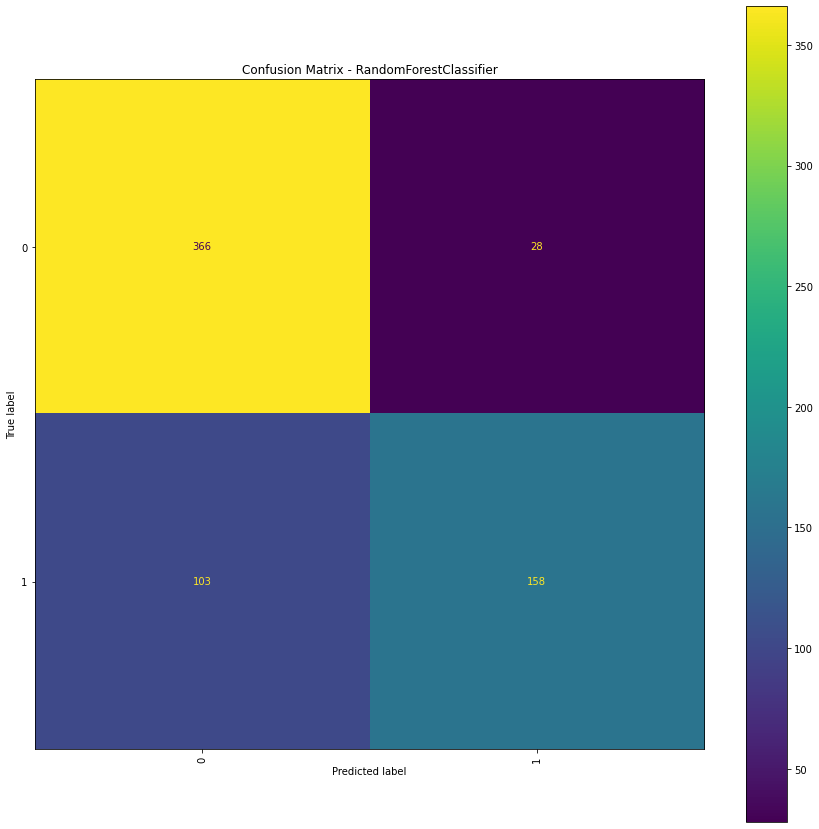

In [50]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.title("Confusion Matrix - RandomForestClassifier")
metrics.plot_confusion_matrix(random, X_test, y_test, xticks_rotation="vertical", ax=ax)

In [51]:
y_score_random = random.predict_proba(X_test)[:,1]

In [52]:
false_positive_rate_random, true_positive_rate_random, threshold_random = roc_curve(y_test, y_score_random)

In [53]:
 print("roc_auc_score for RandomForestClassifier: ", roc_auc_score(y_test, y_score_random))

roc_auc_score for RandomForestClassifier:  0.8703249897893693


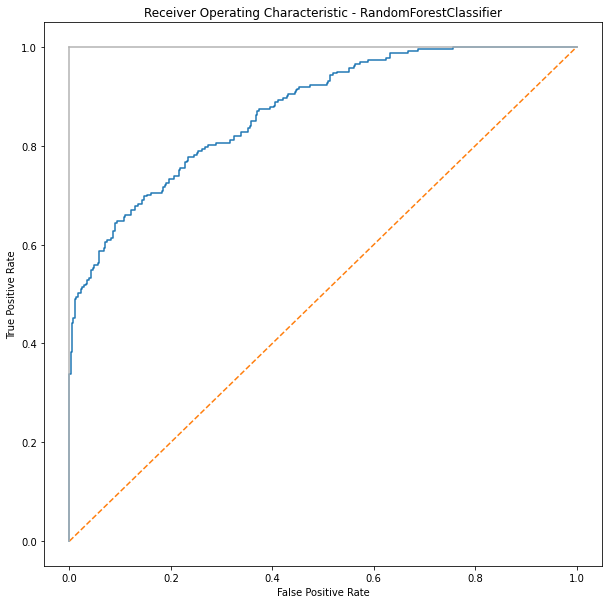

In [54]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate_random, true_positive_rate_random)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest model feature importance analysis

In [55]:
importance = random.feature_importances_

In [56]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.19232
Feature: 1, Score: 0.08818
Feature: 2, Score: 0.08125
Feature: 3, Score: 0.08571
Feature: 4, Score: 0.29720
Feature: 5, Score: 0.06238
Feature: 6, Score: 0.06439
Feature: 7, Score: 0.06670
Feature: 8, Score: 0.06187


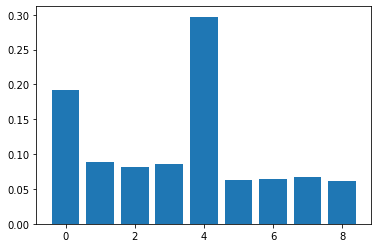

In [57]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [58]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.394514,334.450523,352.486736,6.858023,955.480063,30.694176,8.922352,132.110660,1.967306,0
1,2.801019,200.250326,332.613881,6.104153,851.496167,31.376396,13.352450,80.834576,3.511521,0
2,7.490658,369.862535,344.503017,9.122835,851.496167,26.853029,14.899502,97.409151,2.060444,0
3,7.726705,351.763849,363.334490,7.724066,919.645269,25.188725,16.331552,155.186564,3.640282,0
4,8.569639,291.423142,326.415357,6.004013,777.906274,26.261552,10.015043,42.473146,3.083881,0


Plotting the Receiver Operating Characteristic curve for the three models

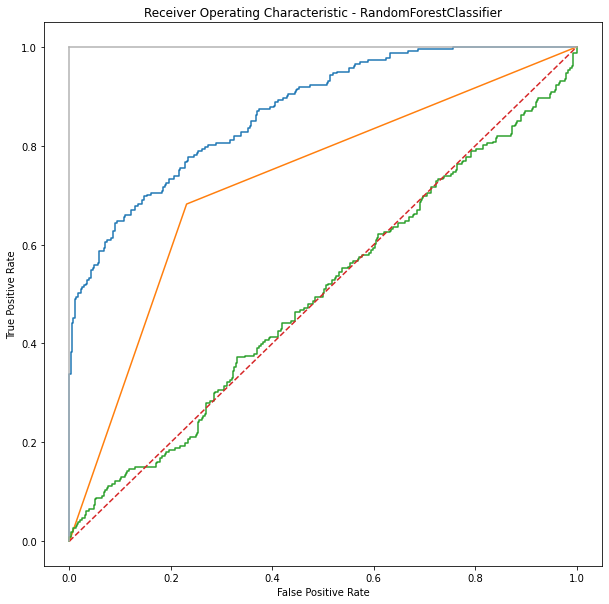

In [59]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate_random, true_positive_rate_random)
plt.plot(false_positive_rate_dectree, true_positive_rate_dectree)
plt.plot(false_positive_rate_logreg, true_positive_rate_logreg)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 3 - Conclusion

### The best model still came short around 10% from the desired accuracy. The Random Forest model labeled 38 water samples of non-potable water as potable. This could cause an enormous variety of illnesses for those who might drink from these waters. Also, the model labeled 92 potable water samples as non-potable, therefore, depriving the local population of a good water source. I find solace in the fact that 525 samples were labeled correctly.y.

In [61]:
import pickle
pickle.dump(random, open('random-forest-water.sav', 'wb'))

In [76]:
df=pd.DataFrame([[4.567316	,399.008553	,328.430022	,4.886734,	1046.341314	,30.381221	,11.179836	,119.819557	,3.182598]],columns=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity'])
res=random.predict(df)